<a href="https://colab.research.google.com/github/diana1915/spam_project/blob/main/VK_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [191]:
# Загрузим данные
df = pd.read_csv('/content/drive/MyDrive/VK/train_spam.csv')
test_df = pd.read_csv('/content/drive/MyDrive/VK/test_spam.csv')

# Data Cleaning

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16278 entries, 0 to 16277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  16278 non-null  object
 1   text       16278 non-null  object
dtypes: object(2)
memory usage: 254.5+ KB


In [193]:
df.drop_duplicates(inplace=True) # удалим дубликаты

In [194]:
df['label']=df['text_type'].apply(lambda x: 1 if x == 'spam' else 0)
df.head(5)

,text_type,text,label
0,ham,make sure alex knows his birthday is over in f...,0
1,ham,a resume for john lavorato thanks vince i will...,0
2,spam,plzz visit my website moviesgodml to get all m...,1
3,spam,urgent your mobile number has been awarded wit...,1
4,ham,overview of hr associates analyst project per ...,0


In [195]:
df.isna().sum() # пропущенных значений нет

text_type    0
text         0
label        0
dtype: int64

# EDA

In [196]:
values = df['label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('Процент не спама (0):' ,percentage_0)
print('Процент спама (1):' ,percentage_1)

Процент не спама (0): 70.4370812073523
Процент спама (1): 29.56291879264769


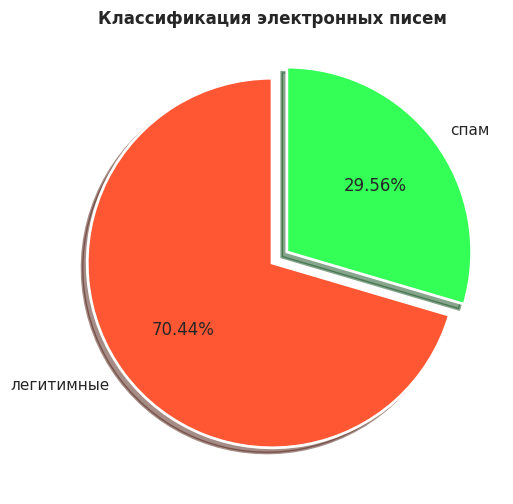

In [197]:
# Создание фигуры
fig, ax = plt.subplots(figsize=(6, 6))

# Создание круговой диаграммы
ax.pie(
    values, labels=['легитимные', 'спам'],
    autopct='%0.2f%%',
    startangle=90,
    colors=['#FF5733', '#33FF57'],
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=(0, 0.1),  # Раздвигаем второй сегмент (spam) на 10%
    shadow=True  # Добавляем тень
)

# Добавление заголовка
ax.set_title('Классификация электронных писем', fontweight='bold');

Как вы видите на графике, процент обычных писем больше, чем процент спам-сообщений. Таким образом, данные являются несбалансированными

In [198]:
# Исследуем числовые характеристики текстов
df['chars'] = df['text'].apply(len)
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [199]:
df[['chars', 'words', 'sentence']].describe()

,chars,words,sentence
count,16267.000000,16267.000000,16267.000000
mean,310.468986,57.141944,1.062212
std,287.887904,52.134400,0.376116
min,1.000000,1.000000,1.000000
25%,60.000000,12.000000,1.000000
50%,157.000000,31.000000,1.000000
75%,639.000000,114.000000,1.000000
max,800.000000,207.000000,12.000000


In [200]:
# Сводная статистика легитимных сообщений
df[df['label'] == 0][['chars', 'words', 'sentence']].describe()

,chars,words,sentence
count,11458.000000,11458.000000,11458.000000
mean,314.293245,58.356694,1.039012
std,307.244128,55.830154,0.334452
min,1.000000,1.000000,1.000000
25%,41.000000,9.000000,1.000000
50%,140.500000,28.000000,1.000000
75%,686.000000,124.000000,1.000000
max,800.000000,181.000000,12.000000


In [201]:
# Сводная статистика спама
df[df['label'] == 1][['chars', 'words', 'sentence']].describe()

,chars,words,sentence
count,4809.000000,4809.000000,4809.000000
mean,301.357247,54.247661,1.117488
std,235.220984,41.903011,0.455741
min,5.000000,1.000000,1.000000
25%,136.000000,24.000000,1.000000
50%,195.000000,36.000000,1.000000
75%,433.000000,79.000000,1.000000
max,800.000000,207.000000,10.000000


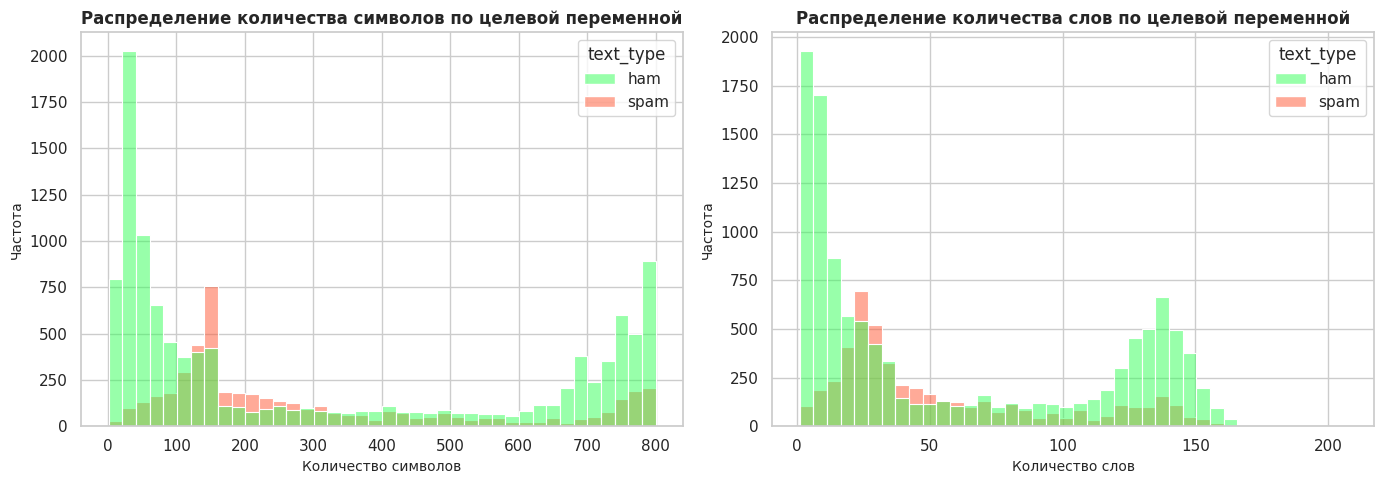

In [202]:
# Создание фигуры
plt.figure(figsize=(14, 5))

# Первый график: распределение длины символов для легитимных и спам-сообщений
plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, первый график
sns.histplot(data=df, x='chars', hue='text_type', palette=['#33FF57', '#FF5733'], bins=40)
plt.xlabel('Количество символов', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Распределение количества символов по целевой переменной', fontsize=12, fontweight='bold')

# Второй график: распределение количества слов для легитимных и спам-сообщений
plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, второй график
sns.histplot(data=df, x='words', hue='text_type', palette=['#33FF57', '#FF5733'], bins=40)
plt.xlabel('Количество слов', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.title('Распределение количества слов по целевой переменной', fontsize=12, fontweight='bold')

# Отображение графиков
plt.tight_layout()
plt.show()

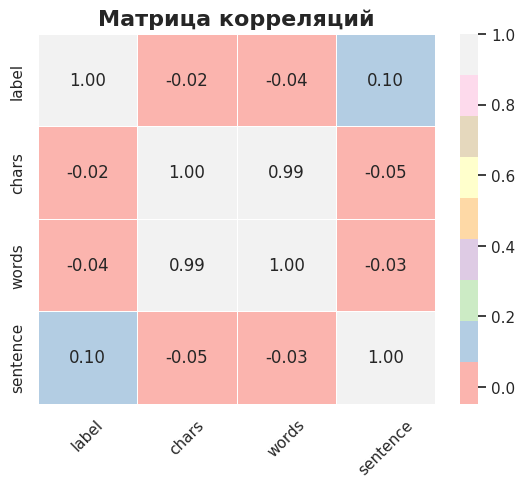

In [203]:
# Посмотрим на корреляции между признаками
corr = df[['label', 'chars', 'words', 'sentence']].corr()
sns.heatmap(corr, annot=True, cmap='Pastel1', linewidths=0.5, fmt=".2f")
plt.title("Матрица корреляций", fontsize=16, fontweight='bold')
plt.xticks(rotation=45);

 # Data Preprocessing

In [204]:
# Porter Stemmer для стемминга текста
from nltk.stem.porter import PorterStemmer
import string

# Создание экземпляра Porter Stemmer
ps = PorterStemmer()

# Функция обработки текста
def preprocessing(text):
    text = text.lower()    # Приведение текста к нижнему регистру
    tokens = word_tokenize(text)    # Токенизация текста
    tokens = [word for word in tokens if word.isalnum()]    # Удаление специальных символов
    # Удаление стоп-слов и пунктуации
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    stemmed_tokens = [ps.stem(word) for word in tokens]    # Стемминг
    return " ".join(stemmed_tokens)

In [205]:
# приведем к нормальной форме текст
df['norm_text'] = df['text'].apply(preprocessing)

In [206]:
df.head()

,text_type,text,label,chars,words,sentence,norm_text
0,ham,make sure alex knows his birthday is over in f...,0,86,16,1,make sure alex know birthday fifteen minut far...
1,ham,a resume for john lavorato thanks vince i will...,0,520,97,1,resum john lavorato thank vinc get move right ...
2,spam,plzz visit my website moviesgodml to get all m...,1,126,22,1,plzz visit websit moviesgodml get movi free al...
3,spam,urgent your mobile number has been awarded wit...,1,139,23,1,urgent mobil number award prize guarante call ...
4,ham,overview of hr associates analyst project per ...,0,733,127,1,overview hr associ analyst project per david r...


# Models

In [208]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, classification_report, auc, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [209]:
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

X = tfid.fit_transform(df['norm_text']).toarray()
y = df['label'].values

In [210]:
# # Делим датасет на тренировочную и тестовую выборки
# X = df['text']
# y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state =42)
len(X_train), len(X_test)

(12200, 4067)

In [211]:
def best_model(X_train, X_test, y_train, y_test):

    best_roc_auc = 0
    best_ml = None

    svc = SVC(kernel= "sigmoid", gamma  = 1.0)
    knc = KNeighborsClassifier()
    mnb = MultinomialNB()
    dtc = DecisionTreeClassifier(max_depth = 5)
    lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
    rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
    abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
    bc = BaggingClassifier(n_estimators = 50, random_state = 2)
    etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
    gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
    xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

    models = [svc, knc, mnb, dtc, lrc, rfc, abc, bc, etc, gbdt, xgb]

    for model in models:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_test)
      roc_auc = roc_auc_score(y_test, y_pred)
      # precision = precision_score(y_test, y_pred)

      if roc_auc > best_roc_auc:
        best_ml = model

    return best_ml

In [ ]:
# Выберем лучшую модель
model = best_model(X_train, X_test, y_train, y_test)

In [53]:
# Запишем итоговый датасет
predict_test = model.predict(test_df['text'])
result = pd.DataFrame({'score': None, 'label': predict_test, 'text': test_df['text']})
result['score'] = result['label'].apply(lambda x: 'spam' if x == 1 else 'ham')
result.drop(columns='label', inplace=True)
result.to_csv('result.csv', index=False)

In [52]:
result

,score,text
0,ham,j jim whitehead ejw cse ucsc edu writes j you ...
1,ham,original message from bitbitch magnesium net p...
2,ham,java for managers vince durasoft who just taug...
3,ham,there is a youtuber name saiman says
4,spam,underpriced issue with high return on equity t...
...,...,...
4065,spam,husband to wifetum meri zindagi hoorwifeor kya...
4066,ham,baylor enron case study cindy yes i shall co a...
4067,ham,boring as compared to tp
4068,ham,hellogorgeous hows u my fone was on charge lst...
